In [10]:
import pathlib
import zipfile
import os
import tensorflow as tf
from PIL import Image as Image
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
import keras
from keras import layers
from keras.datasets import mnist
import numpy as np
import random
import matplotlib.pyplot as plt
from keras import regularizers
from sklearn.model_selection import train_test_split

In [11]:
clean_dataset = "../DatasetL2/Project_Dataset_Unzip"

data_dir = clean_dataset

data_dir = pathlib.Path(data_dir)

In [12]:
image_h = 75
image_w = 75
batch_s = 32

In [13]:
def add_noise(img):
    noise_factor = 0.9
    noise = noise_factor * np.random.normal(loc=0.0, scale=1.0, size=img.shape)
    img = img + noise
    np.clip(img, 0., 1.)
    return img

from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0,
        zoom_range=0,
        horizontal_flip=True,
        validation_split=0.20,
        preprocessing_function=add_noise,
        )

train_generator = train_datagen.flow_from_directory(
        clean_dataset,
        subset = 'training',
        target_size=(image_h, image_w),
        batch_size=32,
        class_mode=None,
        )

test_generator = train_datagen.flow_from_directory(
        clean_dataset,
        subset = 'validation',
        target_size=(image_h, image_w),
        batch_size=32,
        class_mode=None)

Found 120 images belonging to 1 classes.
Found 30 images belonging to 1 classes.


In [14]:
import tensorflow as tf

new_decoder = tf.keras.Sequential([
        keras.Input(shape=(image_h, image_w, 3)),
        tf.keras.layers.Dense(64, activation='relu',activity_regularizer=regularizers.l1(10e-5)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(2048, activation='relu'),
        tf.keras.layers.Dense(5625, activation='sigmoid')
    ])
new_decoder.compile(optimizer = 'adam',
                  loss = 'mean_absolute_error')
new_decoder.fit(train_generator,
                epochs=10,
                batch_size=batch_s,
                shuffle=True,
                validation_data=test_generator,
                )
new_decoder.summary()

Epoch 1/10
4/4 [==============================] - 1s 281ms/step - loss: 2.1855 - val_loss: 2.0906
Epoch 2/10
4/4 [==============================] - 1s 188ms/step - loss: 2.0302 - val_loss: 1.9341
Epoch 3/10
4/4 [==============================] - 1s 193ms/step - loss: 1.8630 - val_loss: 1.7882
Epoch 4/10
4/4 [==============================] -

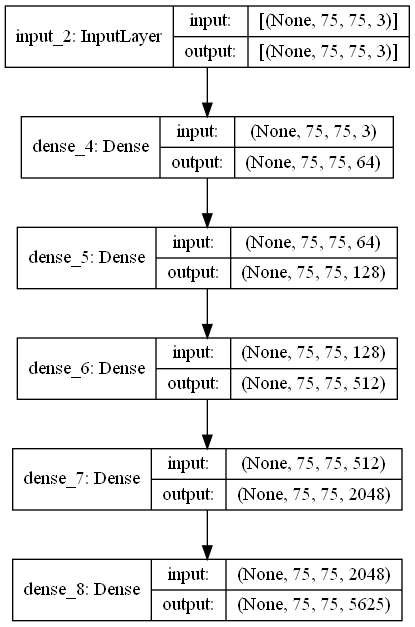

In [15]:
tf.keras.utils.plot_model(new_decoder, show_shapes=True)

In [16]:
decoded_imgs = new_decoder.predict(test_generator, verbose=1)
print(decoded_imgs.shape)

1/1 [==============================] - 14s 14s/step
(30, 75, 75, 5625)


In [29]:
print(decoded_imgs[1].shape)

(75, 75, 5625)


In [30]:
def display_image(X, n):
    plt.figure(figsize=(20, 2))
    for i in range(n):
        ax = plt.subplot(1,n,i+1)
        plt.imshow(X[i].reshape(image_h, image_w))
        #plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

ValueError: cannot reshape array of size 31640625 into shape (75,75)

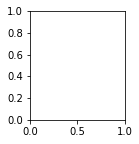

In [31]:
display_image(decoded_imgs,10)